In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Task 1

In [2]:
df = pd.DataFrame({'Data Point':[1,2,3,4,5,6,7,8],\
                  'Valve Position%':[2.0,4.0,6.0,12.0,20.0,25.0,35.0,50.0],\
                  'Stagnation Pressure[psia]':[16.22,18.89,20.82,27.85,36.56,42.30,54.48,70.74],\
                  'Load Cell[Lbf]':[0.072,0.214,0.306,0.601,0.947,1.171,1.649,2.300],'Schlieren File Name':\
                   ['lab3-1','lab3-2','lab3-3','lab3-4','lab3-5','lab3-6','lab3-7','lab3-8']})

In [3]:
df=df.set_index(['Data Point'])

In [4]:
df['Stagnation Pressure[Pa]']=df['Stagnation Pressure[psia]']*6894.76 #convert psi to
df['Load Cell[N]']=df['Load Cell[Lbf]']*4.44822
df = df.drop(('Stagnation Pressure[psia]'),axis=1)
df = df.drop(('Load Cell[Lbf]'),axis=1)

In [5]:
df['Absolute Static Pressure[Pa]']=14.7*6894.76*np.ones(len(df['Stagnation Pressure[Pa]']))

In [6]:
df

,Valve Position%,Schlieren File Name,Stagnation Pressure[Pa],Load Cell[N],Absolute Static Pressure[Pa]
Data Point,,,,,
1,2.0,lab3-1,111833.0072,0.320272,101325.0
2,4.0,lab3-2,130242.0164,0.951919,101325.0
3,6.0,lab3-3,143548.9032,1.361155,101325.0
4,12.0,lab3-4,192019.0660,2.673380,101325.0
5,20.0,lab3-5,252072.4256,4.212464,101325.0
6,25.0,lab3-6,291648.3480,5.208866,101325.0
7,35.0,lab3-7,375626.5248,7.335115,101325.0
8,50.0,lab3-8,487735.3224,10.230906,101325.0


In [7]:
table1 = df.to_excel('table1.xlsx')

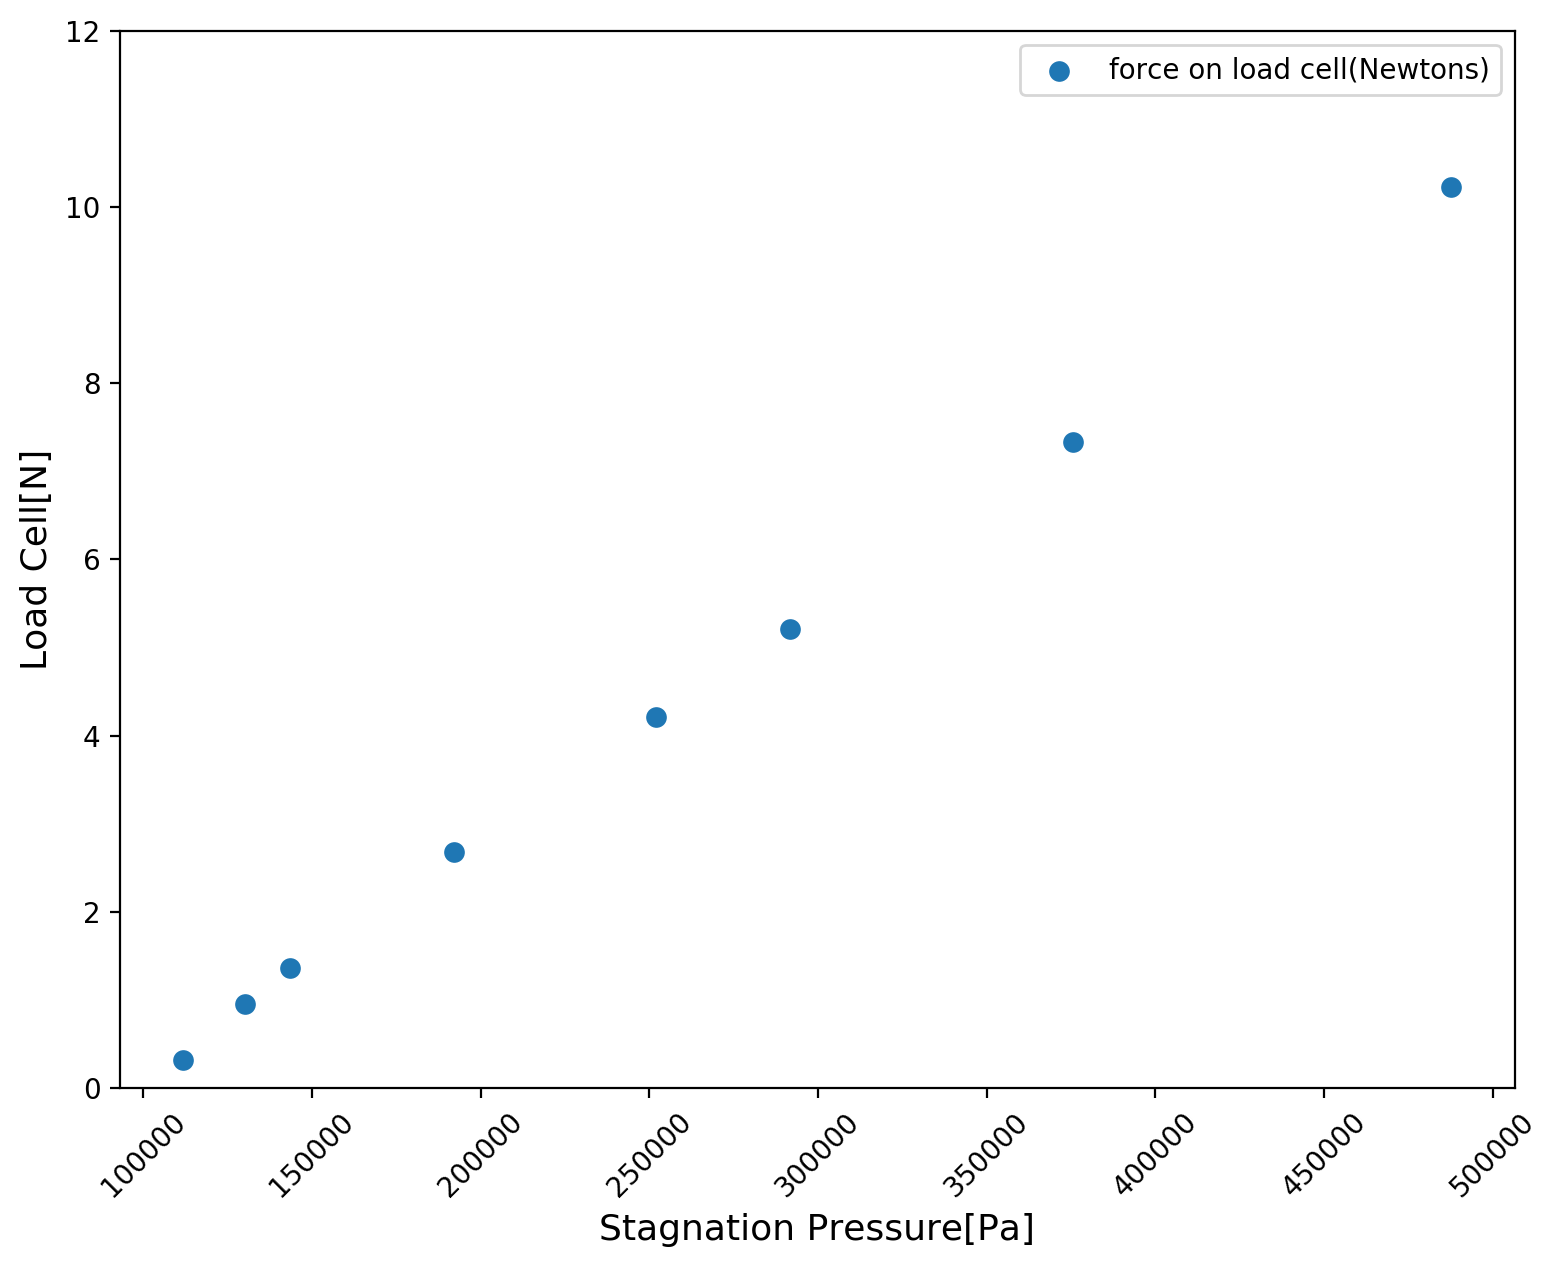

In [8]:
plt.figure(figsize=(9,7),dpi=200)
sns.scatterplot(x='Stagnation Pressure[Pa]',y='Load Cell[N]',data=df,linewidth=1.5,s=80,label='force on load cell(Newtons)')
plt.ylabel('Load Cell[N]',fontsize=13)
plt.xlabel('Stagnation Pressure[Pa]',fontsize=13)
plt.xticks(rotation=45);
plt.legend()
plt.ylim(0,12);

#### The force exerted on the load cell has a positive and approximately linear correlation with increasing stagnation pressure.

## Task 2

$\frac{P_{0}}{P}=\left(1+\frac{\gamma-1}{2} M^{2}\right)^{\gamma /(\gamma-1)}$

In [9]:
gamma=1.4
M_sqaured = ((df['Stagnation Pressure[Pa]']/df['Absolute Static Pressure[Pa]'])**((gamma-1)/gamma) -1)/((gamma-1)/2)

In [10]:
M_isentropic = np.sqrt(M_sqaured)

In [11]:
df['M_isentropic']=M_isentropic

In [12]:
P0_choked = 101325/ 0.52828178 #compressible flow calculator
P0_choked

191801.04981095504

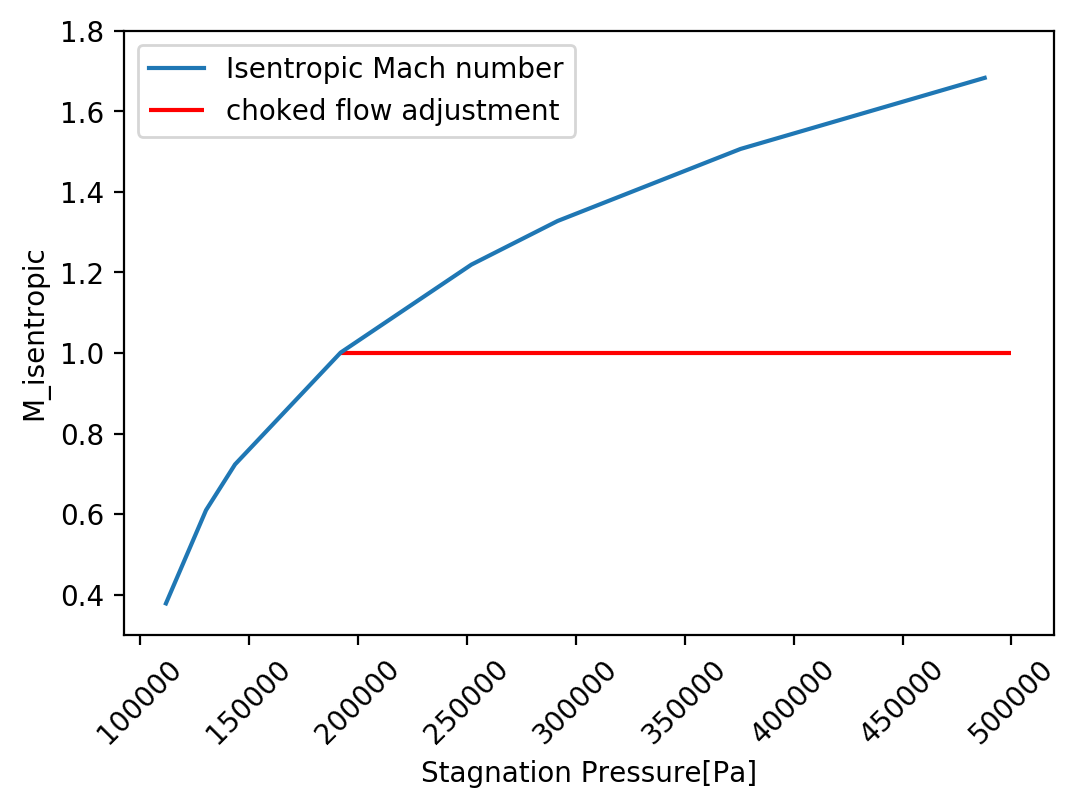

In [13]:
plt.figure(dpi=200);
sns.lineplot(x='Stagnation Pressure[Pa]',y='M_isentropic',data=df,label='Isentropic Mach number')
plt.hlines(y=1.0,xmin=P0_choked,xmax=500000,color='r',label='choked flow adjustment')
plt.legend()
plt.ylim(0.3,1.8);
plt.xticks(rotation=45);